## DAFSA-Timeline

*Packages:*

In [30]:
import pm4py
import pandas as pd
import numpy as np
#import timelinelogprocessing as dft
#import timelineevaluation as eva
import seaborn as sns

In [31]:
from pm4py.algo.discovery.dfg.variants import timelinelogprocessing

ImportError: cannot import name 'timelinelogprocessing' from 'pm4py.algo.discovery.dfg.variants' (/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/variants/__init__.py)

In [19]:
from pm4py.algo.discovery.dfg.variants import timelinelogprocessing as dft
from pm4py.algo.evaluation.timeline import timelineevaluation as eva

ImportError: cannot import name 'timelinelogprocessing' from 'pm4py.algo.discovery.dfg.variants' (/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/pm4py/algo/discovery/dfg/variants/__init__.py)

In [5]:
%load_ext autoreload
%autoreload 2

**ToDo**

- next steps

- check changes in activity name (now only "_v1" possible)

- update the timeline object when new activities are introduced

---

## Data
Output is a dataframe with the log.

#### Var 1: Test logs

In [80]:
# single instance
log_perfect = {"concept:name":['A', 'B', 'C'], 
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12)],
              "case:concept:name": ['1', '1', '1']}
log_repetitions = {"concept:name":['A', 'C', 'A', 'C'], 
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12),
                   pd.Timestamp(year=2017, month=1, day=3, hour=12)],
              "case:concept:name": ['1', '1', '1', '1']}
log_loop = {"concept:name":['A', 'B', 'A'], 
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=5, hour=12)],
              "case:concept:name": ['1', '1', '1']}

In [591]:
# two instances
log_perfect = {"concept:name":['A', 'B', 'C', 'A', 'B', 'D'], 
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12),
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12)],
              "case:concept:name": ['2', '2', '2', '1', '1', '1']}
log_repetitions = {"concept:name":['A', 'A', 'B', 'A', 'B', 'B'], 
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12),
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12)],
              "case:concept:name": ['1', '1', '1', '2', '2', '2']}
log_contradiction = {"concept:name":['A', 'B', 'C', 'C', 'B', 'A'], 
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12),
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=5, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=6, hour=12)],
              "case:concept:name": ['1', '1', '1', '2', '2', '2']}

In [4]:
# jan example
log_janexample = {"concept:name":['A', 'B', 'C', 'A', 'B', 'D'], 
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=2, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=3, hour=12),
                   pd.Timestamp(year=2017, month=1, day=1, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=7, hour=12), 
                   pd.Timestamp(year=2017, month=1, day=8, hour=12)],
              "case:concept:name": ['1', '1', '1', '2', '2', '2']}

In [5]:
#df = pd.DataFrame.from_dict(log_perfect)
#df = pd.DataFrame.from_dict(log_repetitions)
#df = pd.DataFrame.from_dict(log_loop)
#df = pd.DataFrame.from_dict(log_contradiction)
df = pd.DataFrame.from_dict(log_janexample)

#### Var 2: Real logs

In [10]:
path_log = "data/running_example.xes"
#path_log = "notebooks/data/running_example.xes"
#path_log = "notebooks/data/receipt.xes"
#path_log = "notebooks/data/sepsis.xes"
#path_log = "notebooks/data/repairExample.xes"

In [11]:
df = pm4py.read_xes(path_log)

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

### Log Preprocessing

In [12]:
df = dft.simplifyLog(df).copy()

In [14]:
df = dft.dafsaDFG(df)

In [16]:
df = dft.timeruleDFG(df)

---
## Evaluation

Calculations:

*Factors*

- Count number of activities (easy)
- Count number of sequence variants (easy)
- Count number of recurrent events of the same activity type (easy)

*Metrics*

- Calculate the correlation between arc length and arc time differences (hard)
- Calculate DFG size (i.e., number of nodes and arcs) (easy)
- Calculate number of contradictions between directly follows relation and timeline

In [6]:
statistics_table = eva.timelineEvaluationScript(df)

In [8]:
statistics_table#[['contradictions_includesselfloops', 'contradictions_excludesselfloops']]

,amount_activities,amount_seqvariants,recurr_events,recurr_sequences,number_events,number_sequences,share_events,share_sequences,dfgsize_nodes,dfgsize_edges,...,r_spearcorr_xy,p_spearcorr_xy,r_pearcorr_y,p_pearcorr_y,r_spearcorr_y,p_spearcorr_y,r_pearcorr_y0,p_pearcorr_y0,r_spearcorr_y0,p_spearcorr_y0
log_original,4,2,0,0,4,2,0.0,0.0,4,3,...,0.987486,0.100818,0.990257,0.088937,0.990257,0.088937,0.998453,0.035416,0.998453,0.035416
log_dafsa,4,2,0,0,4,2,0.0,0.0,4,3,...,0.987134,0.102231,0.990257,0.088937,0.990257,0.088937,0.998453,0.035416,0.998453,0.035416
log_timerule,4,2,0,0,5,2,0.0,0.0,5,4,...,0.999780,0.000220,0.999990,0.000010,0.999990,0.000010,0.999990,0.000010,0.999990,0.000010
log_hybrid,4,2,0,0,5,2,0.0,0.0,5,4,...,0.999567,0.000433,0.999990,0.000010,0.999990,0.000010,0.999990,0.000010,0.999990,0.000010


In [9]:
# save table
statistics_table.to_excel("output.xlsx")

In [19]:
ACTIVITY_COL = 'concept:name'
CASE_COL = 'case:concept:name'
TIME_COL = 'time:timestamp'

## Evaluationskript

In [13]:
eva.evaluationScript()

== Evaluation starts ==

-----------------
start evaluation: 1
-----------------
Event log:  running_example3.xes
- Import log


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

- Import succesful
- Evaluate log
- Evaluate succesful
- Export statistics
- Export succesful
-----------------
end evaluation: 1
-----------------

-----------------
start evaluation: 2
-----------------
Event log:  running_example2.xes
- Import log


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

- Import succesful
- Evaluate log
- Evaluate succesful
- Export statistics
- Export succesful
-----------------
end evaluation: 2
-----------------

-----------------
start evaluation: 3
-----------------
Event log:  running_example.xes
- Import log


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

- Import succesful
- Evaluate log
- Evaluate succesful
- Export statistics
- Export succesful
-----------------
end evaluation: 3
-----------------

== Evaluation ends == 


## Evaluation Metrics (include in code)

In [118]:
eva.countRecurrentActivities(df)

{'register request': {'min': 1.0, 'max': 1.0, 'mean': 1.0, 'median': 1.0},
 'examine casually': {'min': 1.0, 'max': 3.0, 'mean': 1.5, 'median': 1.0},
 'check ticket': {'min': 1.0, 'max': 3.0, 'mean': 1.5, 'median': 1.0},
 'decide': {'min': 1.0, 'max': 3.0, 'mean': 1.5, 'median': 1.0},
 'reinitiate request': {'min': 1.0, 'max': 2.0, 'mean': 1.5, 'median': 1.5},
 'examine thoroughly': {'min': 1.0, 'max': 1.0, 'mean': 1.0, 'median': 1.0},
 'pay compensation': {'min': 1.0, 'max': 1.0, 'mean': 1.0, 'median': 1.0},
 'reject request': {'min': 1.0, 'max': 1.0, 'mean': 1.0, 'median': 1.0}}

In [143]:
activity = 'check ticket'
ACTIVITY_COL = 'concept:name'
CASE_COL = 'case:concept:name'
TIME_COL = 'time:timestamp'

In [144]:
df_group = df[df[ACTIVITY_COL]==activity].groupby(CASE_COL)[TIME_COL].count() > 1

In [241]:
len(df[ACTIVITY_COL])#.unique())

42

In [243]:
eva.countRecurrentActivities(df)

{'recurr_events': 15,
 'recurr_sequences': 2,
 'number_events': 42,
 'number_sequences': 6,
 'share_events': 0.357,
 'share_sequences': 0.333}

In [227]:
len(df[df.groupby(
        [ACTIVITY_COL, CASE_COL])[ACTIVITY_COL].transform('count') > 1].groupby([CASE_COL])[CASE_COL].count())

2

In [211]:
df[df.groupby(
        [ACTIVITY_COL, CASE_COL])[ACTIVITY_COL].transform('count') > 1]

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name
2,check ticket,Ellen,2010-12-30 16:34:00+00:00,check ticket,Ellen,100,3
3,decide,Sara,2011-01-06 09:18:00+00:00,decide,Sara,200,3
6,check ticket,Pete,2011-01-08 11:43:00+00:00,check ticket,Pete,100,3
7,decide,Sara,2011-01-09 09:55:00+00:00,decide,Sara,200,3
25,examine casually,Mike,2011-01-07 10:16:00+00:00,examine casually,Mike,400,5
26,check ticket,Pete,2011-01-08 11:22:00+00:00,check ticket,Pete,100,5
27,decide,Sara,2011-01-10 13:28:00+00:00,decide,Sara,200,5
28,reinitiate request,Sara,2011-01-11 16:18:00+00:00,reinitiate request,Sara,200,5
29,check ticket,Ellen,2011-01-14 14:33:00+00:00,check ticket,Ellen,100,5
30,examine casually,Mike,2011-01-16 15:50:00+00:00,examine casually,Mike,400,5


In [206]:
len(df[df.groupby(['case:concept:name', 'concept:name'])['concept:name'].transform('count') > 1]) #['concept:name'].count()# > 1

15

---

## Visualize the DFG with Timeline

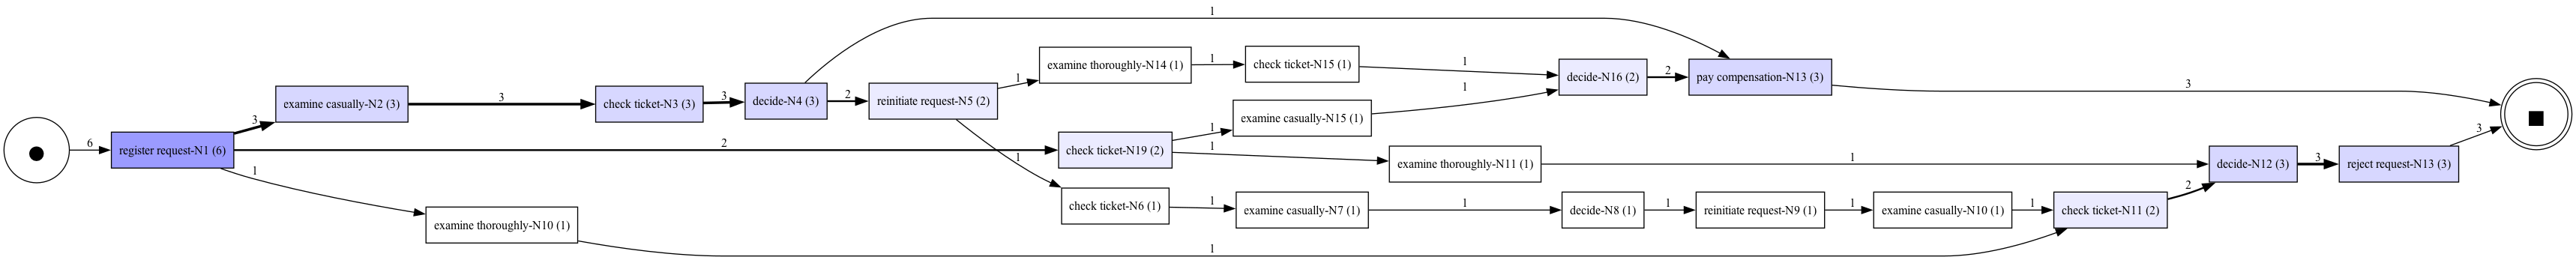

In [31]:
dfg, start_activities, end_activities = pm4py.discover_directly_follows_graph(df)
pm4py.view_dfg(dfg,start_activities, end_activities)

### Mean Time

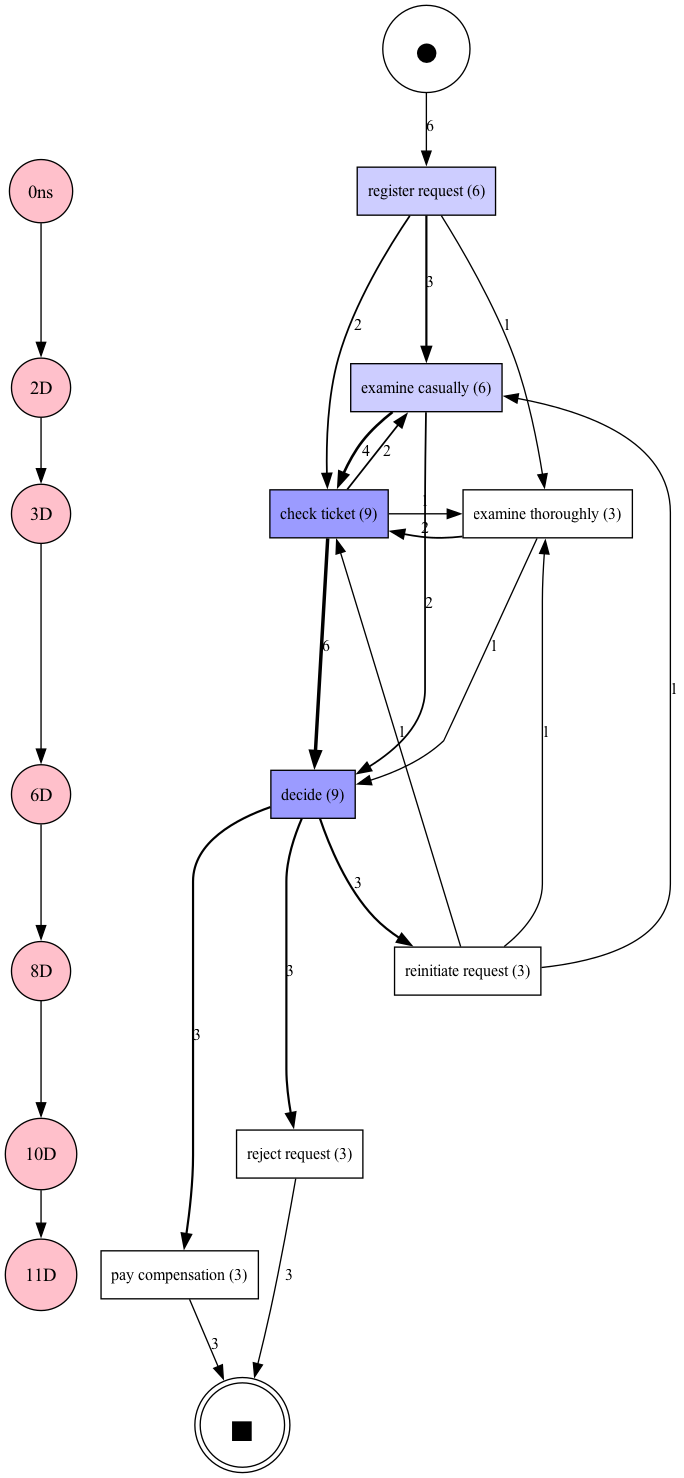

In [12]:
from pm4py.algo.discovery.dfg.variants import clean_time
from pm4py.visualization.dfg.variants import timeline as timeline_gviz_generator
from pm4py.visualization.dfg import visualizer as dfg_visualizer
dfg, start_act, end_act = pm4py.discover_dfg_typed(df)
dfg_time = clean_time.apply(df)
#print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

### Median Time

{'A': Timedelta('0 days 00:00:00'), 'B': Timedelta('3 days 12:00:00'), 'C': Timedelta('2 days 00:00:00'), 'D': Timedelta('7 days 00:00:00')}


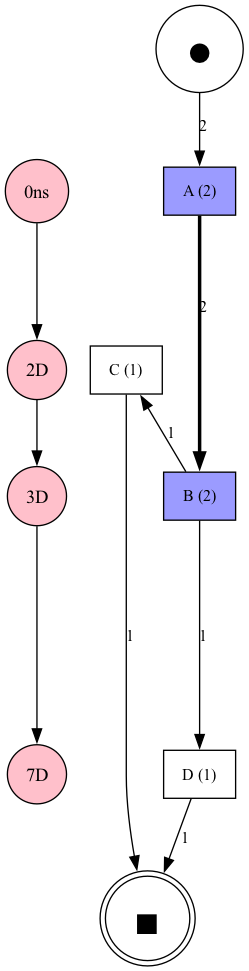

In [41]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(df)
dfg_time = clean_time.apply(df, parameters={"aggregation": "median"})
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

### Min Time

In [42]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(df2)
dfg_time = clean_time.apply(df2, parameters={"aggregation": "min"})
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

NameError: name 'df2' is not defined

### Max Time

{'register request_1': Timedelta('0 days 00:00:00'), 'examine thoroughly_17': Timedelta('0 days 23:04:00'), 'check ticket_6': Timedelta('15 days 02:32:00'), 'decide_7': Timedelta('17 days 04:10:00'), 'reject request_5': Timedelta('18 days 05:54:00'), 'check ticket_2': Timedelta('0 days 21:04:00'), 'examine casually_3': Timedelta('0 days 02:44:00'), 'decide_4': Timedelta('9 days 19:23:00'), 'pay compensation_5': Timedelta('15 days 20:13:00'), 'examine casually_9': Timedelta('1 days 01:14:00'), 'check ticket_10': Timedelta('2 days 02:20:00'), 'decide_11': Timedelta('6 days 18:46:00'), 'reinitiate request_12': Timedelta('6 days 21:46:00'), 'examine thoroughly_21': Timedelta('6 days 22:34:00'), 'check ticket_3': Timedelta('8 days 21:11:00'), 'examine thoroughly_6': Timedelta('1 days 23:41:00'), 'check ticket_13': Timedelta('8 days 05:31:00'), 'examine casually_14': Timedelta('10 days 06:48:00'), 'decide_15': Timedelta('13 days 02:16:00'), 'reinitiate request_16': Timedelta('14 days 03:46:0

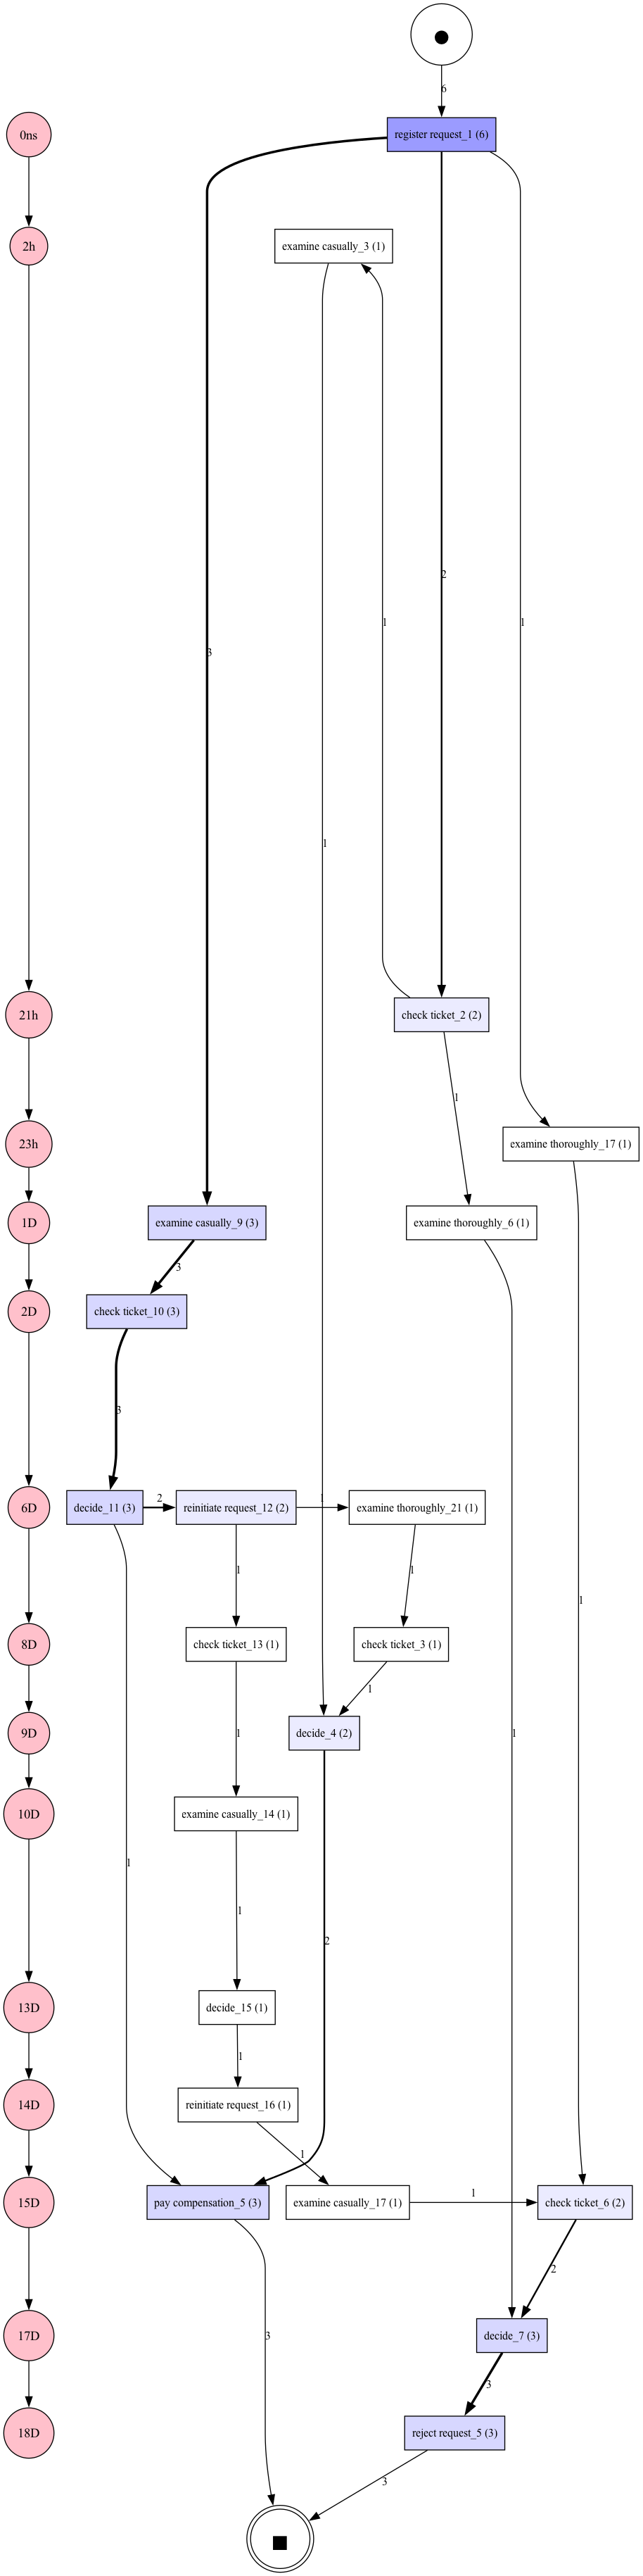

In [761]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(df2)
dfg_time = clean_time.apply(df2, parameters={"aggregation": "max"})
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

---